In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name="data" )

In [103]:
df.shape

(3999, 12)

In [40]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [41]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [43]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [116]:
#standardize the data to normal distribution
from sklearn import preprocessing
df_standardized = preprocessing.scale(df)
print(df_standardized)
df_standardized = pd.DataFrame(df_standardized)

[[-1.73512503e+00 -4.51140783e-01 -1.86298687e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-1.73426342e+00 -5.39456874e-01 -1.86298687e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-1.73340181e+00 -3.20031232e-01 -1.86298687e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [ 1.72682006e+00 -4.29480975e-05 -1.86298687e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [ 1.72768167e+00 -1.85606976e-01 -1.86298687e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [ 1.72854328e+00 -7.00507951e-01 -1.86298687e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


# K-CLUSTERING

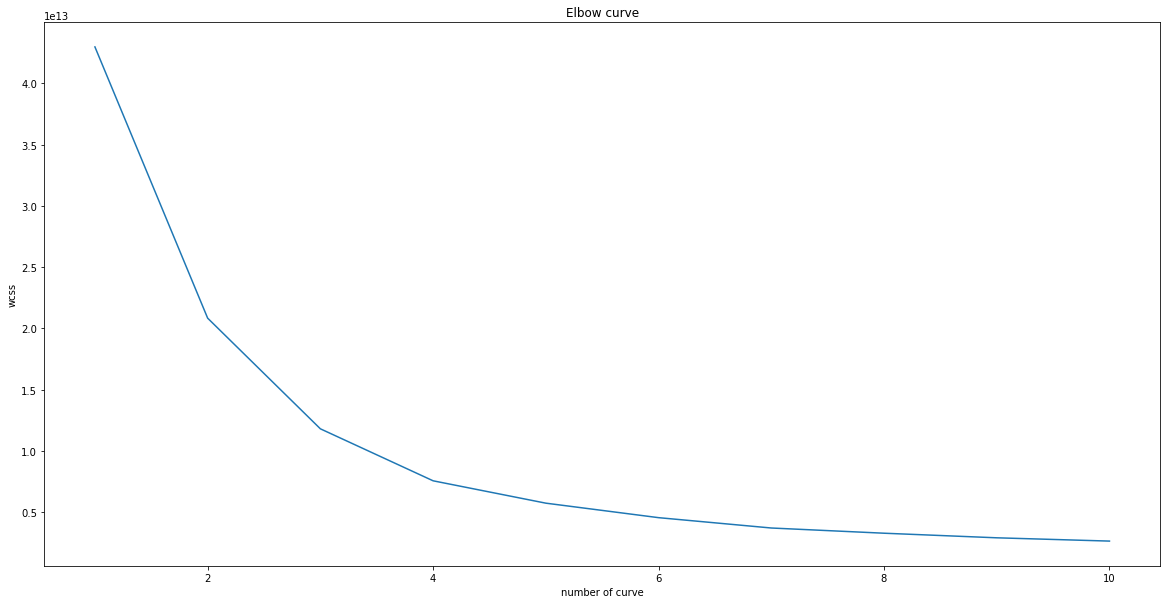

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 10))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow curve')
plt.xlabel('number of curve')
plt.ylabel('wcss')
plt.show()

In [53]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)

y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [71]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
1,1096.0,57102.4,104.4,1.4,1.0,1.0,5904.6,8.0,234.1,0.7,5710.7,0.3
2,3135.2,39803.1,103.8,1.4,1.0,1.0,6208.7,7.8,205.2,0.6,2150.3,0.2
3,1735.5,197550.8,826.3,2.2,1.0,1.0,32996.1,28.1,5519.0,16.4,4706.2,0.8
4,1540.2,127132.4,153.0,4.0,1.0,1.0,45686.2,19.5,371.5,1.1,4965.9,0.7


In [59]:
df[df['cluster']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,2193,194875,0,1,1,1,7550,6,1050,3,3831,1,1
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,1
2194,2211,81251,0,1,1,1,19500,6,0,0,3958,1,1
2200,2217,12271,500,2,1,1,7684,15,1000,2,4219,0,1


In [60]:
df[df['cluster']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,2
1424,1438,22093,0,3,1,1,14857,11,200,1,2587,0,2
1950,1967,15676,0,1,1,1,0,0,0,0,3178,0,2
1951,1968,55064,0,2,1,1,8041,13,0,0,3329,1,2
1952,1969,40675,0,1,1,1,1413,9,0,0,2895,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [61]:
df[df['cluster']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,3
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,3
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,3
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,3
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,3
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,3
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,3


In [63]:
df[df['cluster']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,4
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,4
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,4
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,4
3897,3920,179832,2954,3,1,1,18218,20,2500,5,1569,1,4
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,4


# CSV FILE DOWNLOAD AFTER CLUSTERING

In [93]:
from IPython.display import HTML
import base64

data = df
def create_download_link( data, title = "Download CSV file After the Clustering", filename = "airlines.csv"):  
    csv = data.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# DBSCAN Clustering

In [132]:
array=df.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [133]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [134]:
db_default = DBSCAN(eps = 0.8, min_samples = 12).fit(X)
labels = db_default.labels_

In [135]:
#-1 is an noise
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [136]:
data=pd.DataFrame(labels,columns=['db_cluster'])

In [137]:
data

,db_cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [138]:
pd.concat([data,df],axis=1)

,db_cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,0,2,19244,0,1,1,1,215,2,0,0,6968,0
2,0,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0
4,-1,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,1,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,1,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,0,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Hierarchical Clustering

In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,:10])

In [9]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472
...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868


In [10]:
df_norm.drop('ID#',
  axis='columns', inplace=True)

In [11]:
X = df_norm.iloc[:,:10]
y = df.iloc[:,11:]

In [12]:
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472


In [13]:
y.head()

,Award?
0,0
1,0
2,0
3,0
4,1


In [14]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

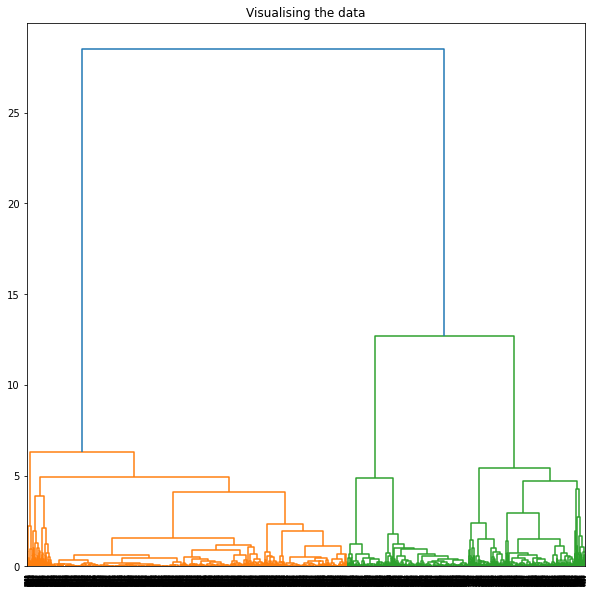

In [15]:
plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
# create dendrogram
Dendrogram = sch.dendrogram((sch.linkage(df_norm, method ='ward')))

In [16]:
# create clusters
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [17]:
ac

AgglomerativeClustering(n_clusters=5)

In [18]:
# save clusters for chart
y_ac = ac.fit_predict(X)
Clusters=pd.DataFrame(y_ac,columns=['Clusters'])

In [19]:
X['hw_clusterid'] = ac.labels_

<ipython-input-19-5b270b56a28e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hw_clusterid'] = ac.labels_


In [20]:
X


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,hw_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,1
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0


<AxesSubplot:>

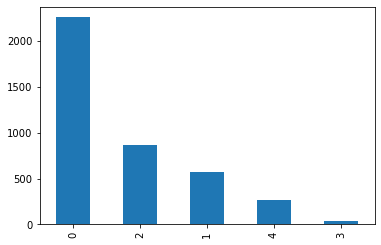

In [21]:
X['hw_clusterid'].value_counts().plot.bar()

In [22]:
X.groupby('hw_clusterid').agg(['mean']).reset_index()

,hw_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
,,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.029417,0.014595,0.001440,0.000000,0.000111,0.014139,0.075311,0.014425,0.025171
1,1,0.066643,0.024582,0.749561,0.000877,0.021053,0.164276,0.241269,0.026825,0.047567
2,2,0.045004,0.003354,0.422612,0.000000,0.000000,0.064557,0.183477,0.007709,0.012723
3,3,0.040529,0.002136,0.017857,0.678571,0.000000,0.051853,0.204873,0.019356,0.042677
4,4,0.105184,0.006666,0.999042,0.000000,0.000000,0.291916,0.244988,0.016623,0.026314


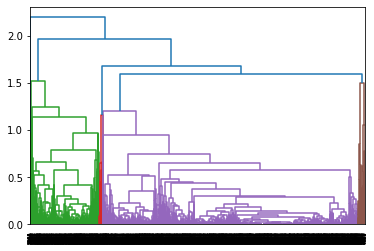

In [23]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [24]:
# create clusters
ac1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [25]:
# save clusters for chart
y_ac1 = ac1.fit_predict(X)
Clusters=pd.DataFrame(y_ac1,columns=['Clusters'])

In [26]:
X['hc_clusterid'] = ac1.labels_

<ipython-input-26-941c502be041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hc_clusterid'] = ac1.labels_


In [27]:
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,hw_clusterid,hc_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0,1
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,2,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0,1


<AxesSubplot:>

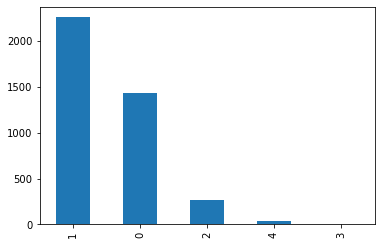

In [28]:
X['hc_clusterid'].value_counts().plot.bar()

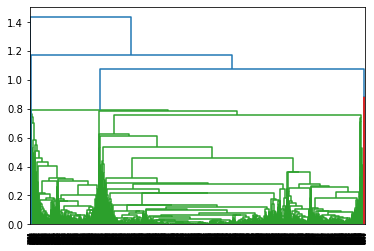

In [29]:

dendrogram = sch.dendrogram(sch.linkage(df_norm, method ='average'))

In [ ]:
# create clusters
ac2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [ ]:
# save clusters for chart
y_ac2 = ac2.fit_predict(df_norm)
Clusters=pd.DataFrame(y_ac2,columns=['Clusters'])

In [ ]:
X['hs_clusterid'] = ac2.labels_

In [ ]:
X['hs_clusterid'].value_counts().plot.bar()

In [ ]:
X